In [1]:
import pandas as pd
import numpy as np

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

def get_metric_values(df, input_type, metric_name):
    if input_type not in df["input_type"].unique():
        raise ValueError(f"'{input_type}' is not a valid input_type. "
                         f"Available: {df['input_type'].unique().tolist()}")
    if metric_name not in df["metric_name"].unique():
        raise ValueError(f"'{metric_name}' is not a valid metric_name. "
                         f"Available: {df['metric_name'].unique().tolist()}")
    
    metric_values = df[(df["input_type"] == input_type) &
                       (df["metric_name"] == metric_name)]["value"]
    return metric_values.values

def read_metrics(experiment_key: str) -> [pd.DataFrame, int]:
    experiment_metrics = pd.read_csv(f"loggs/{experiment_key}/metrics.csv")
    num_loged_epochs = experiment_metrics["epoch"].max() + 1
    return experiment_metrics, num_loged_epochs

def get_model_norm(results):
    return results[results["metric_name"] == "weights_l2"] \
        .groupby("epoch")["value"] \
        .apply(lambda x: np.sqrt((x**2).sum())).values

## Figure 2

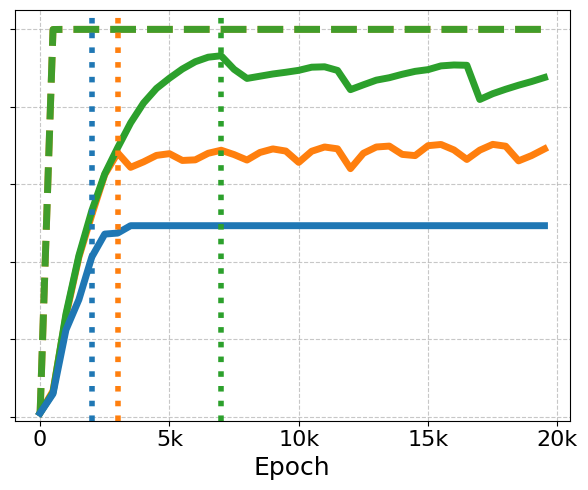

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938|softmax_precision-16",
                   "add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938",
                   "add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938|softmax_precision-64"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")


#ax.plot(epochs, experiment_results_64_stable_sum["test"]["accuracy"], linewidth=linewidth, label='Test accuracy stable sum', color=colors[2])
ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
#ax.plot(epochs, experiment_results_64_stable_sum["train"]["accuracy"], linewidth=linewidth, linestyle='--', color=colors[2])
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - stable sum\n float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]
ax.set_yticklabels([])


ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

plt.show()

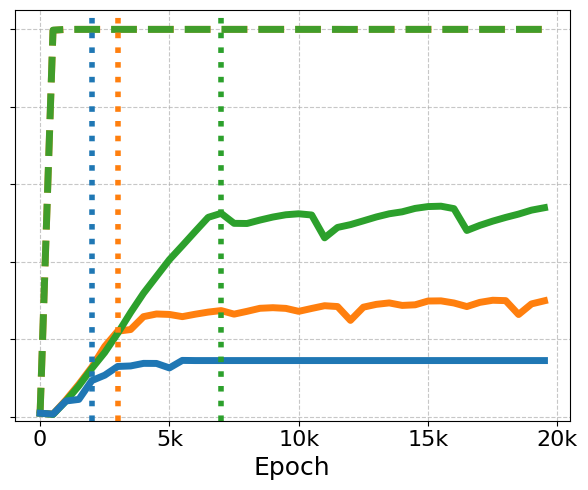

In [3]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch


from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661|softmax_precision-16",
                   "add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661",
                   "add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661|softmax_precision-64"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - stable_sum_fp64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]



ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_yticklabels([])
plt.tight_layout()  

plt.show()

[0.         0.         0.         0.         0.         0.00176229
 0.33698845 0.12414333 0.2776581  0.2974349  0.3015469  0.20990796
 0.09398864 0.31035832 0.3242608  0.33189738 0.18738985 0.27589583
 0.32661054 0.35578617 0.33757588 0.1619346  0.29351869 0.32680634
 0.37203836 0.33816329 0.1497944  0.30840024 0.35402387 0.37595457
 0.2753084  0.27785391 0.32073623 0.37399647 0.37752104 0.19013119
 0.31799489 0.34070882 0.35089093 0.27844134]


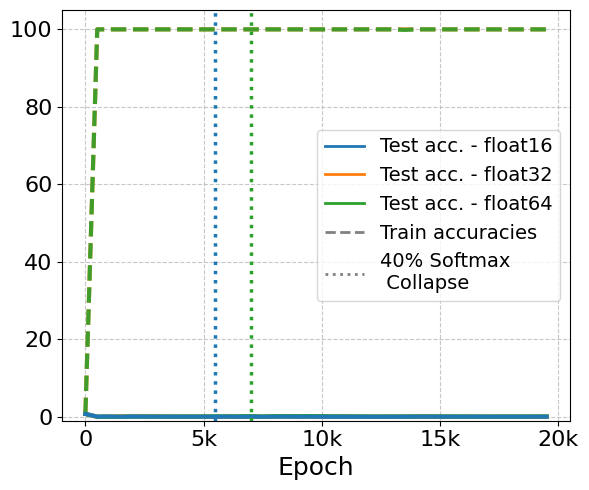

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-16|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-64|adam_epsilon-1e-30"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')

ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)

print(softmax_collapse_32)
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.4))[0][0]*log_frequency, color=colors[0], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
# ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.4))[0][0]*log_frequency, color=colors[1], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.4))[0][0]*log_frequency, color=colors[2], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='40% Softmax\n Collapse'),
]

ax.legend(handles=legend_elements, loc='center right', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

plt.show()

[0.         0.         0.         0.         0.         0.00176229
 0.33698845 0.12414333 0.2776581  0.2974349  0.3015469  0.20990796
 0.09398864 0.31035832 0.3242608  0.33189738 0.18738985 0.27589583
 0.32661054 0.35578617 0.33757588 0.1619346  0.29351869 0.32680634
 0.37203836 0.33816329 0.1497944  0.30840024 0.35402387 0.37595457
 0.2753084  0.27785391 0.32073623 0.37399647 0.37752104 0.19013119
 0.31799489 0.34070882 0.35089093 0.27844134]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03602898 0.46406892 0.23066379 0.26590952 0.2755042
 0.28607792 0.2976307  0.30898765 0.3236734  0.33718425 0.36244369
 0.38750735 0.3722342  0.29449773 0.25024477 0.28509888 0.29626003
 0.30409241 0.31936556 0.33287644 0.34991187 0.37105933 0.38672408
 0.4027805  0.39122772 0.32954767 0.34031722]


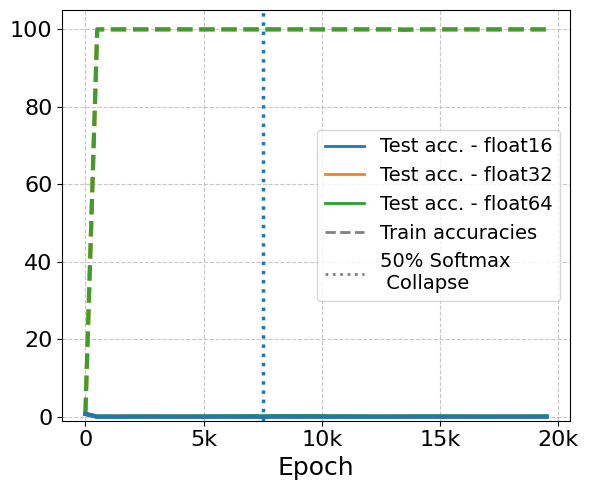

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-16|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-64|adam_epsilon-1e-30"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')

ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)

print(softmax_collapse_32)
print(softmax_collapse_64)
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
# ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
# ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax\n Collapse'),
]

ax.legend(handles=legend_elements, loc='center right', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()
plt.savefig('figure_2a_50_sc.png')
plt.show()